Matplotlib is building the font cache; this may take a moment.


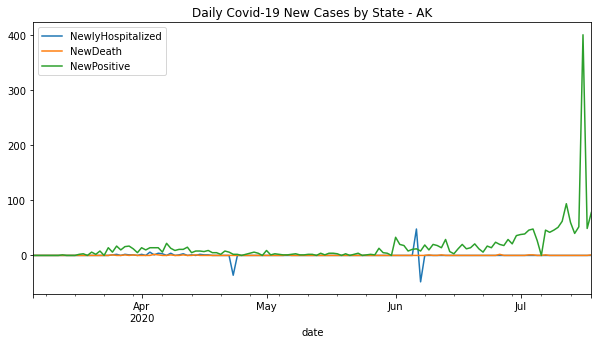

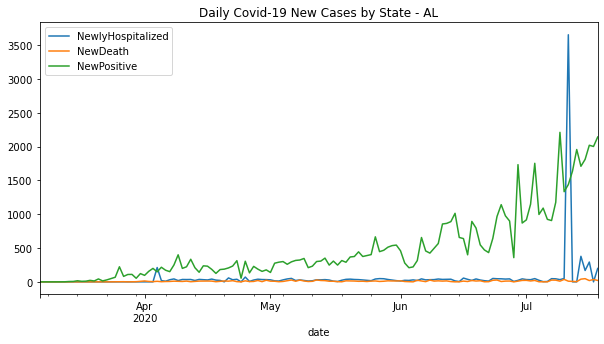

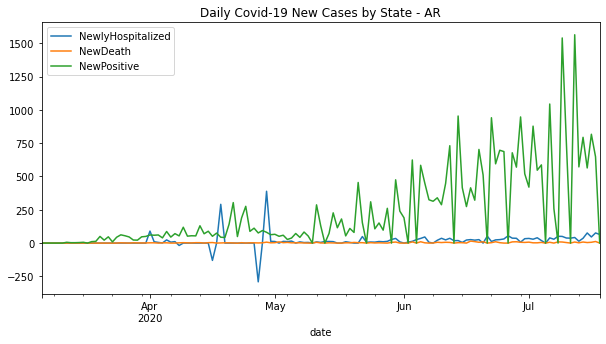

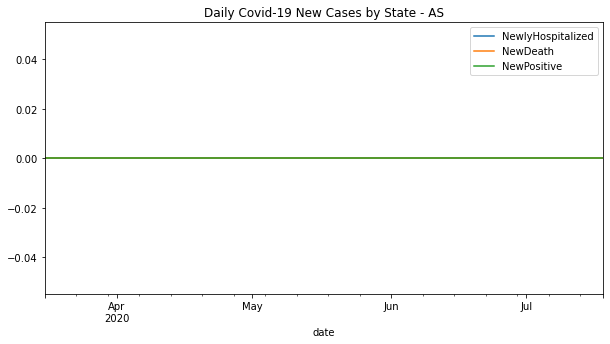

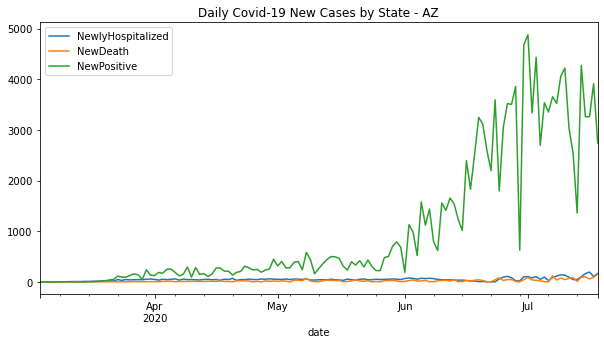

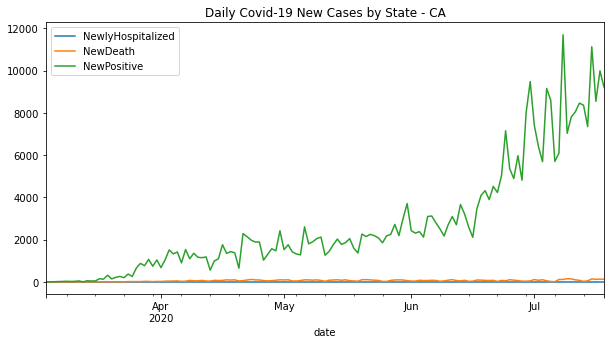

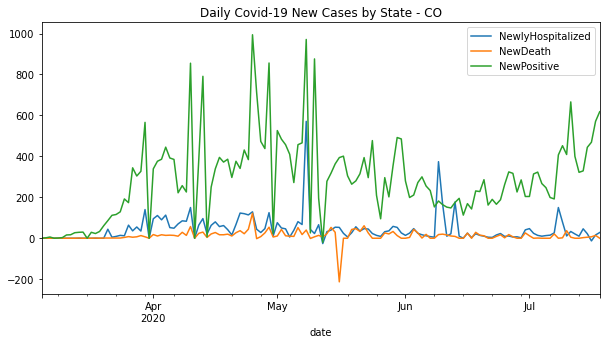

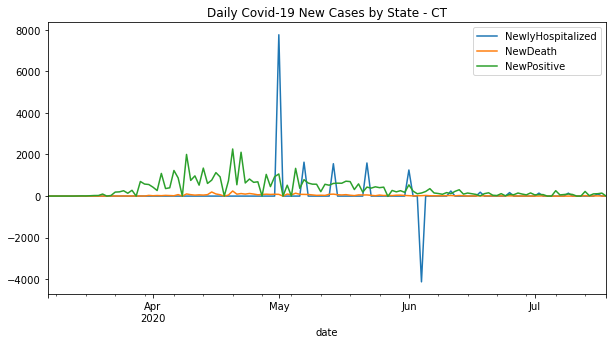

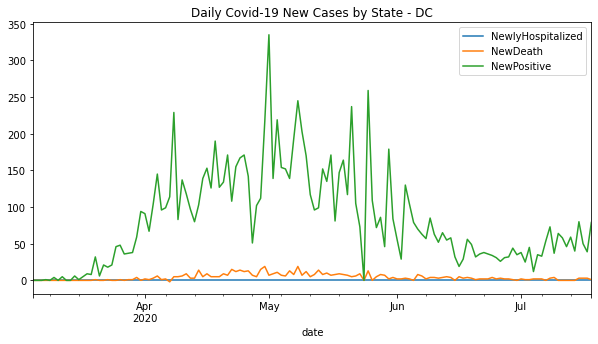

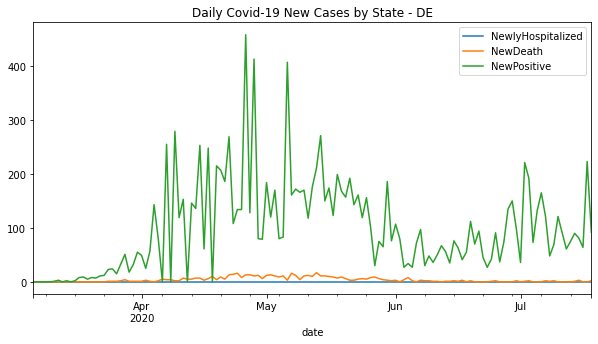

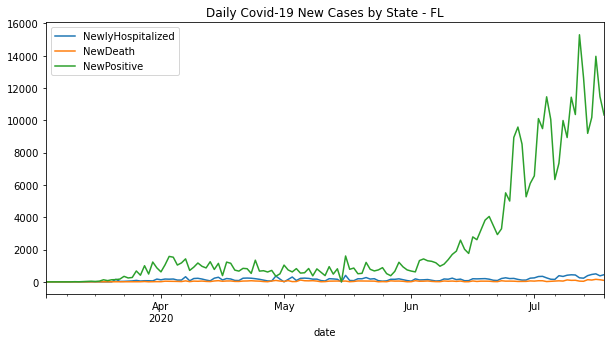

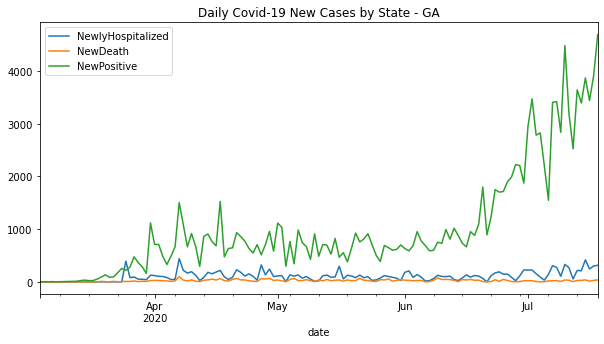

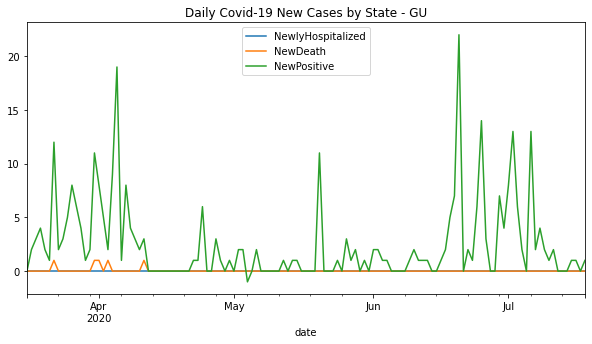

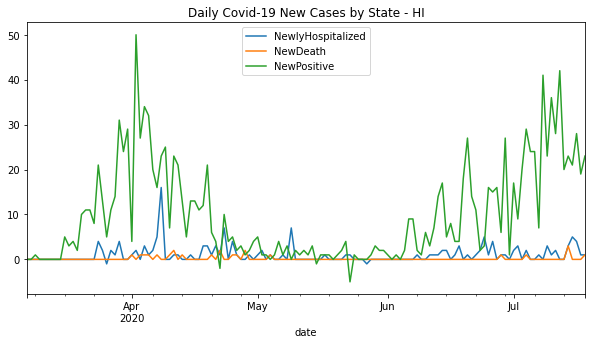

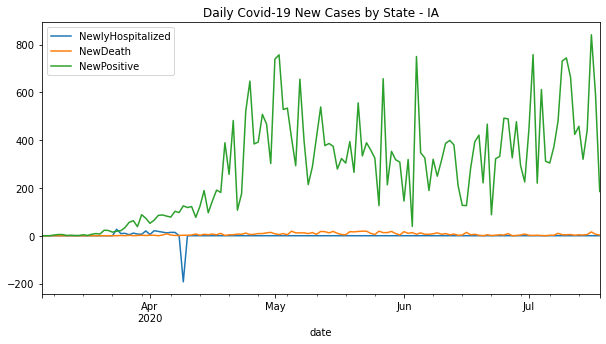

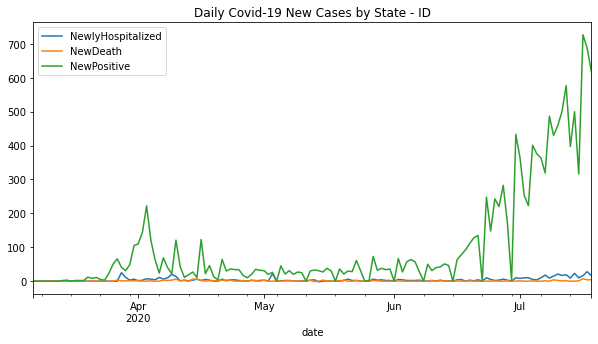

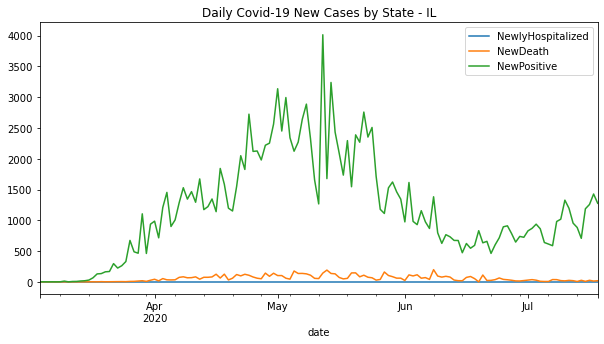

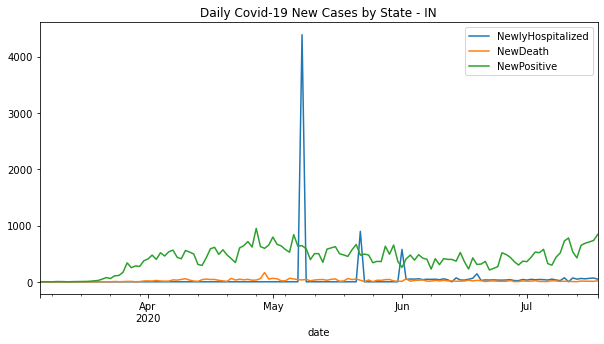

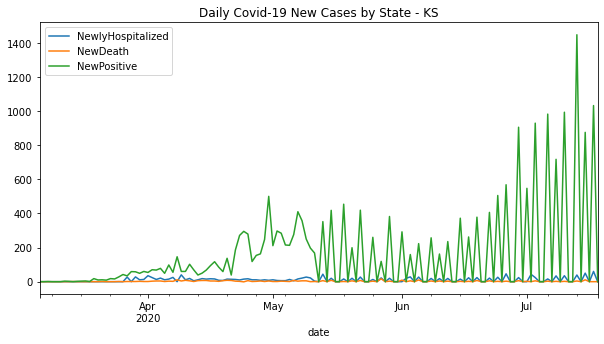

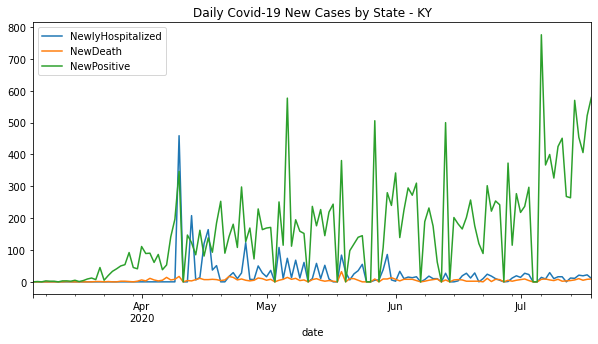

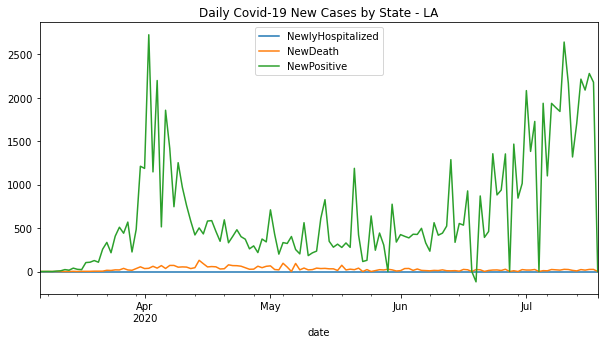

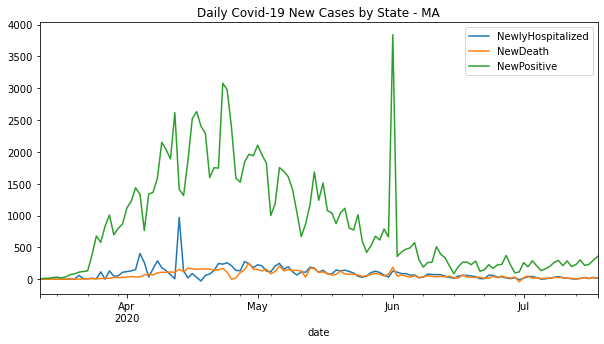

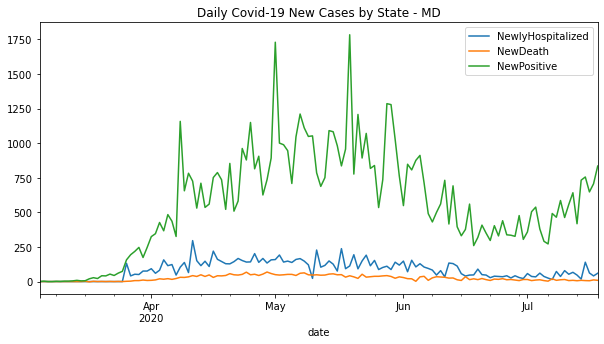

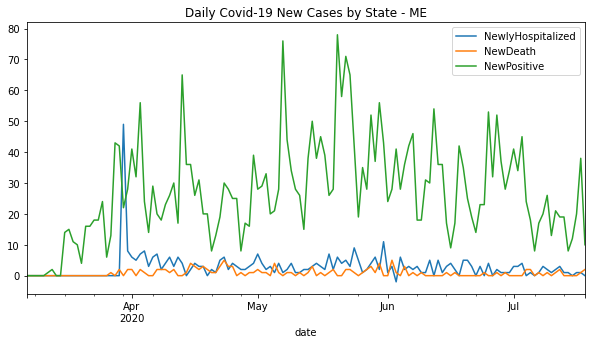

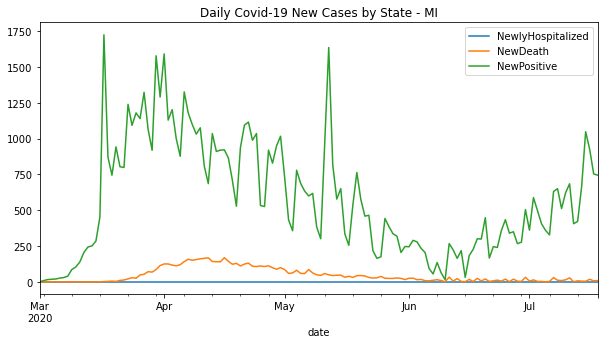

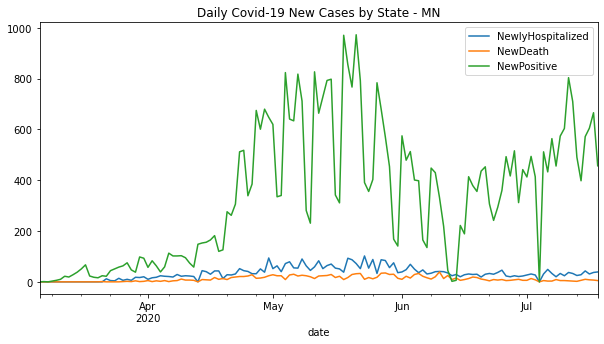

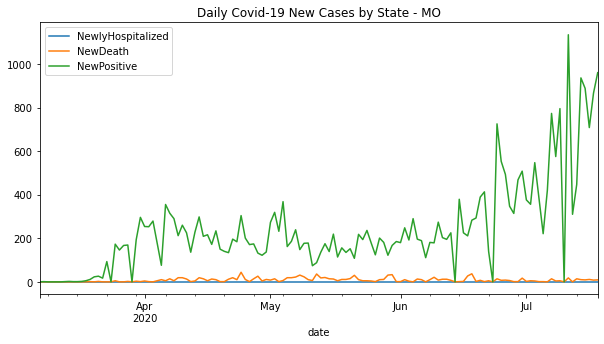

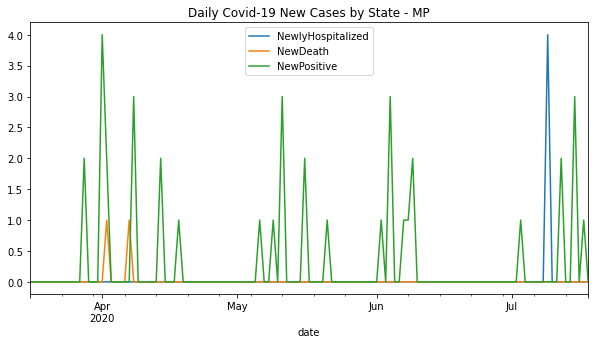

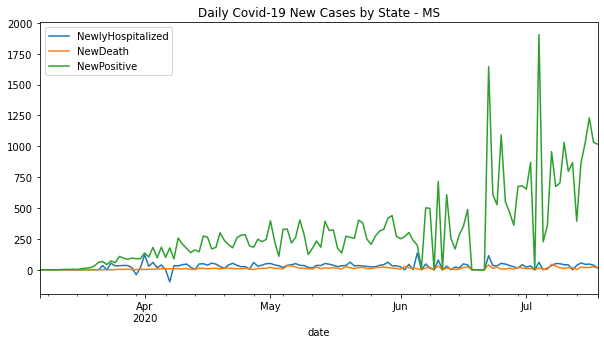

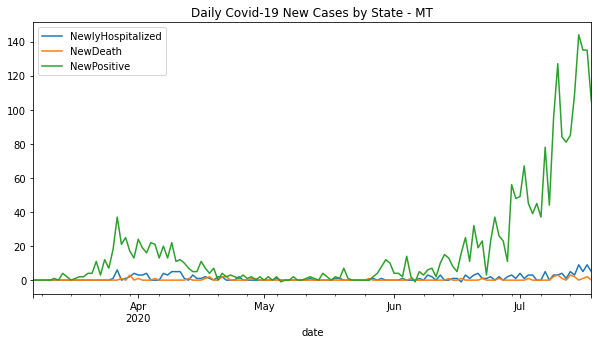

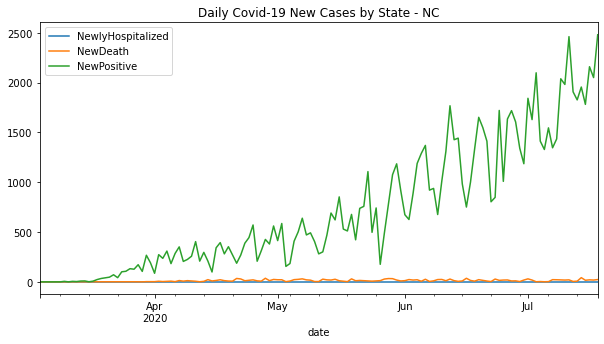

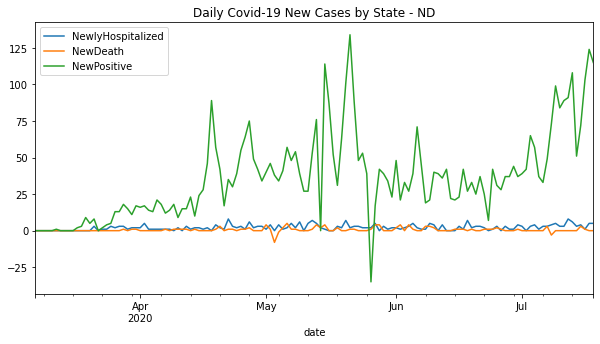

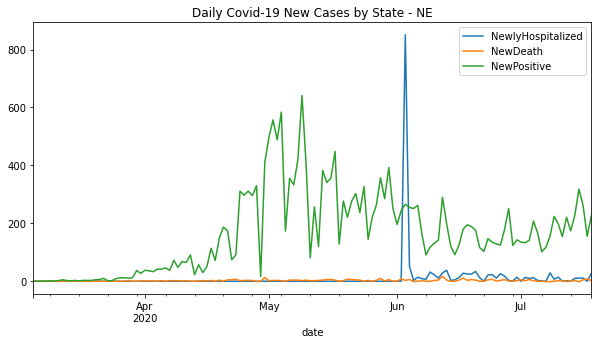

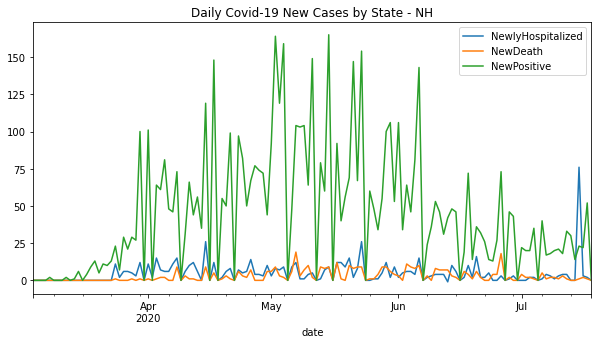

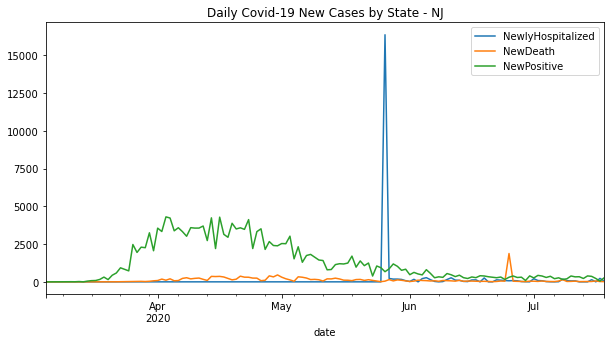

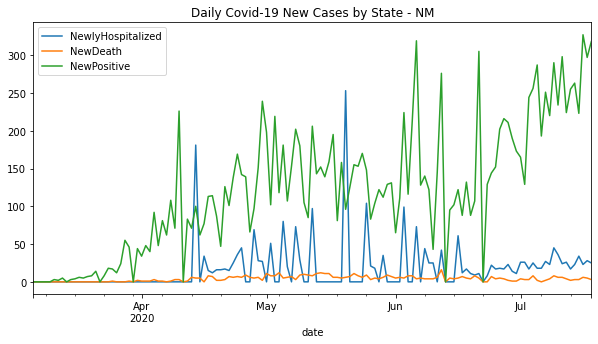

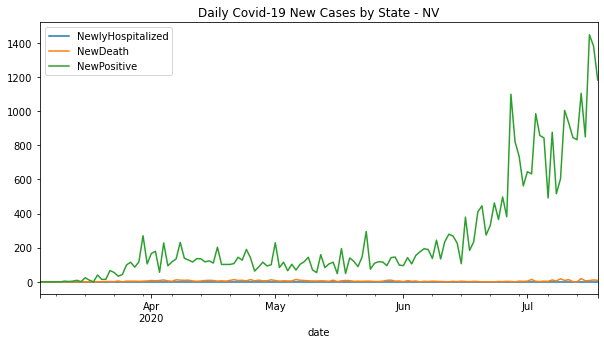

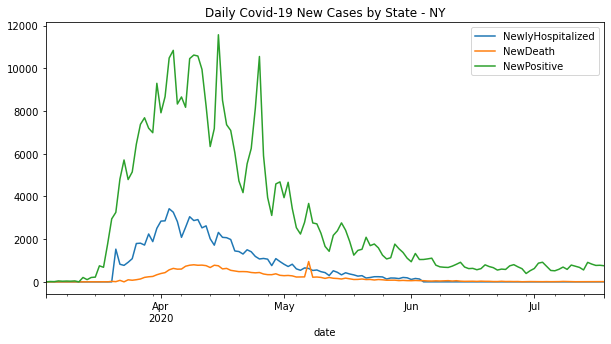

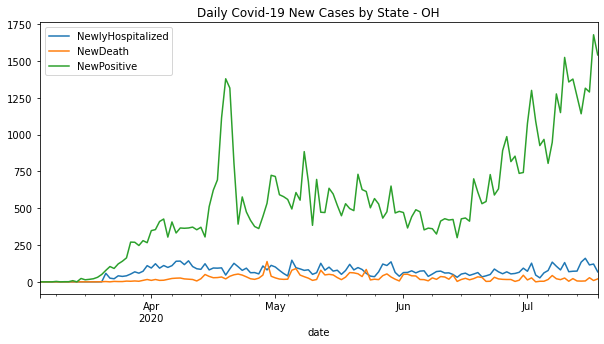

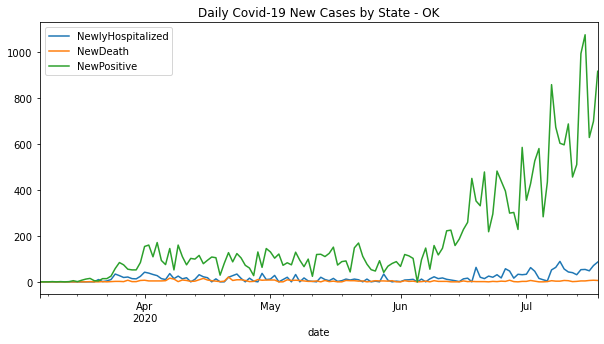

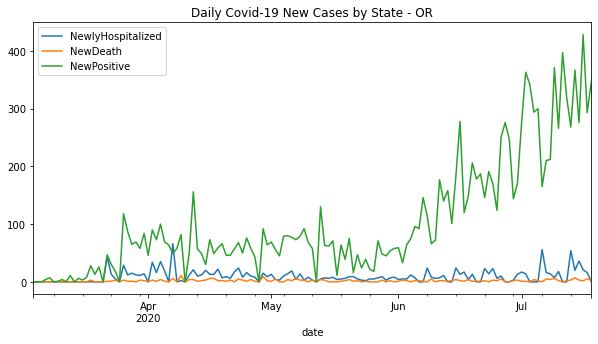

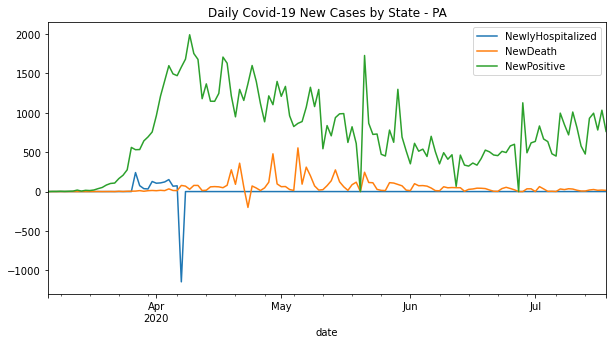

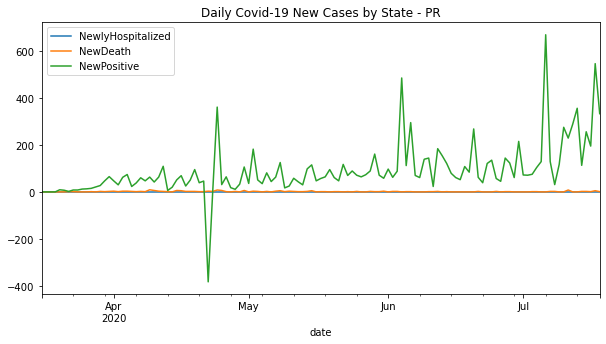

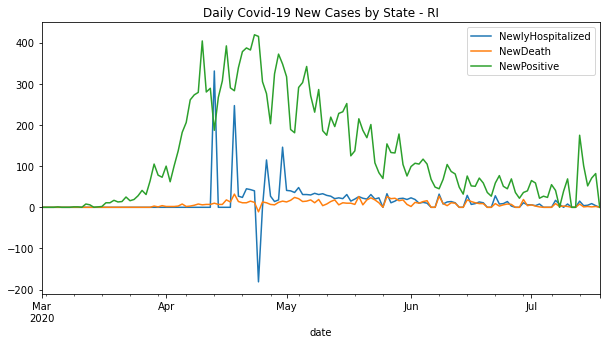

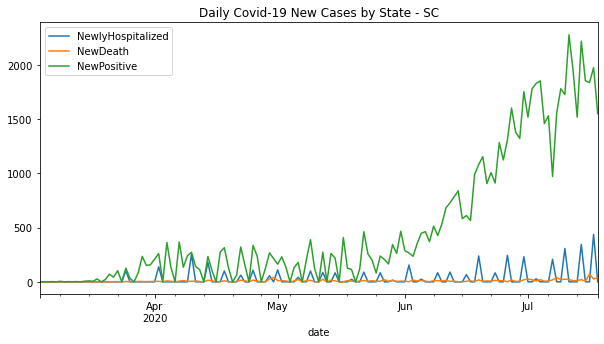

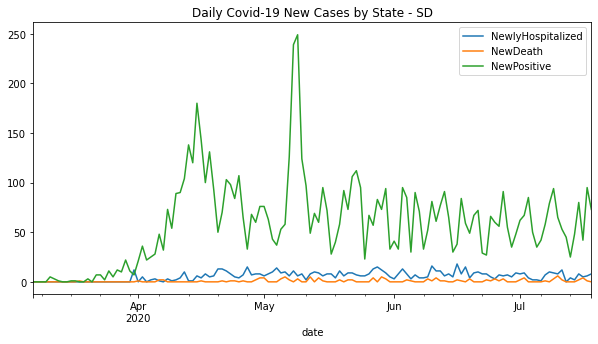

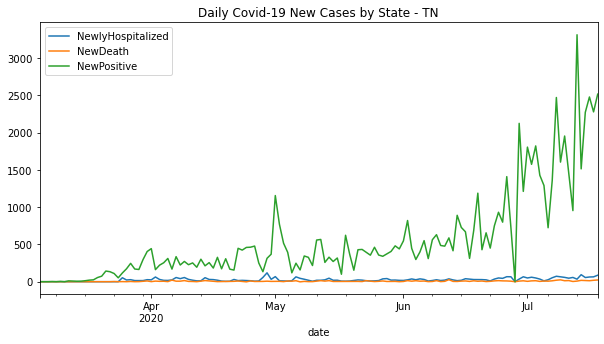

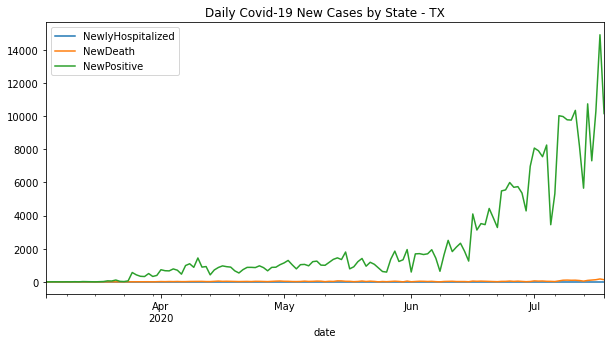

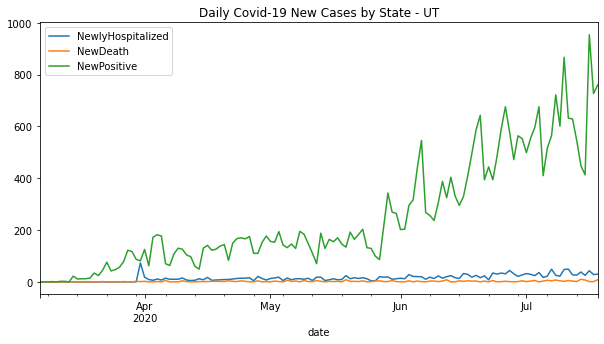

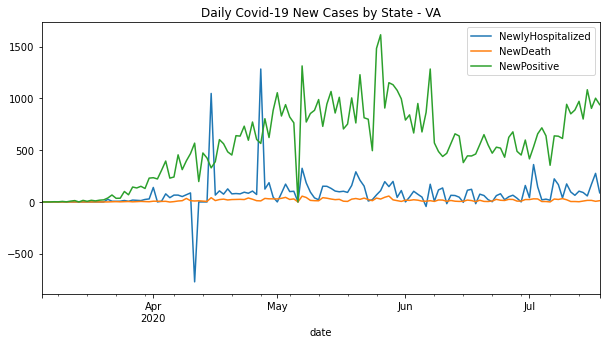

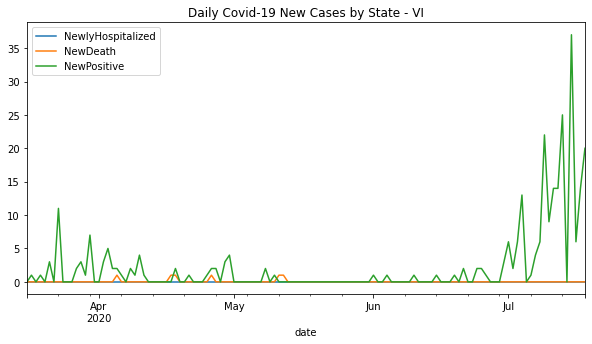

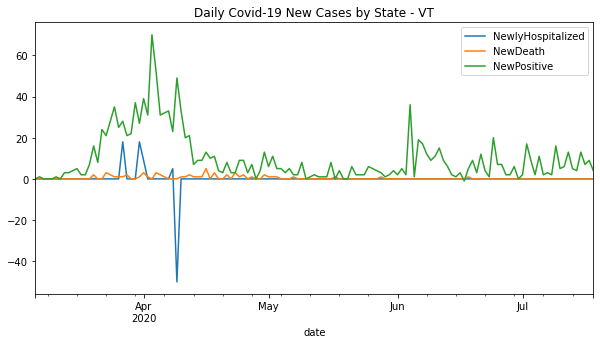

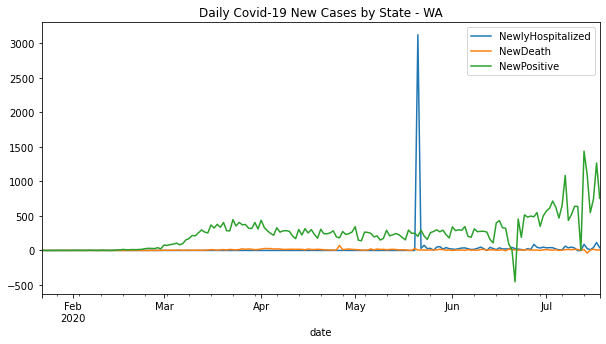

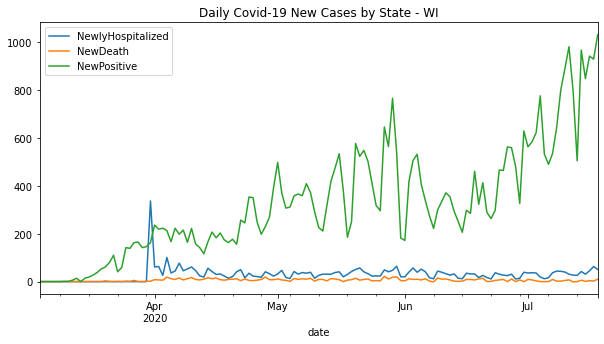

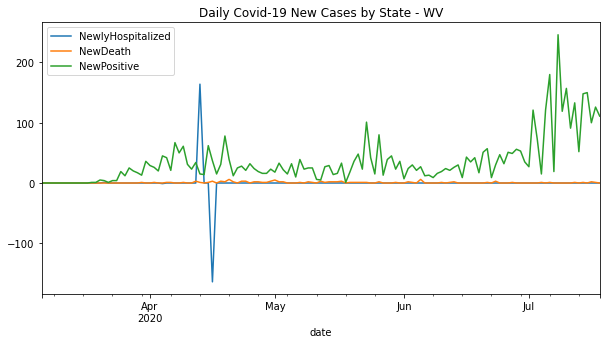

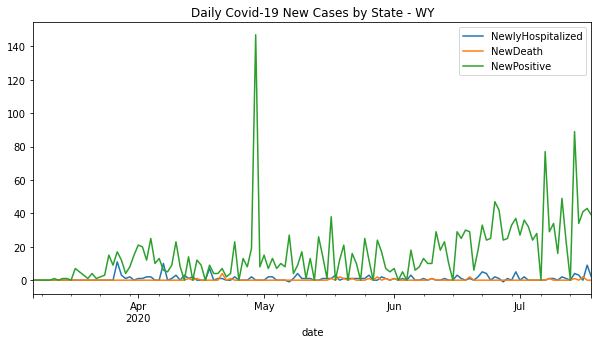

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Covid-19 daily data for all states from the Covid Tracking Project
url = "https://covidtracking.com//api/v1/states/daily.csv"
data = pd.read_csv(url, sep=",")
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data = data.rename(columns={'hospitalizedIncrease': 'NewlyHospitalized', 'deathIncrease': 'NewDeath', 
                     'positiveIncrease': 'NewPositive'})
# get the list of states reported
state_list = data.state.unique()

# go over all states to generate line plots
plt.rcParams.update({'figure.max_open_warning': 0})

for name in state_list:
    cur_state_data = data.loc[data['state'] == name, ["date", "NewlyHospitalized","NewDeath", "NewPositive" ]].copy()
    cur_state_data = cur_state_data.set_index('date')
    #fig, ax = plt.subplots(figsize=(10, 5))
    #ax.set(xlabel ="Date", ylabel="Number of Cases")
    plot_title = "Daily Covid-19 New Cases by State - " + name
    cur_state_data.plot(title = plot_title, figsize=(10, 5))       
    plt.show()